In [1]:
import pandas as pd

# load dataset
dataset = pd.read_excel("NewDataset02.xlsx")

X = dataset.iloc[0:, [0,1,2,3]].values
Y = dataset.iloc[0:, 4].values
df = pd.DataFrame(X)
df
#dataset.describe()

,0,1,2,3
0,0.59486,1.00490,1.28570,2.05990
1,0.81313,1.55400,0.39603,0.57177
2,0.29142,0.42424,0.27432,0.55928
3,0.59963,1.16070,0.57842,1.19220
4,0.56688,1.21600,0.69757,0.75902
...,...,...,...,...
155,0.90826,1.31300,0.58354,1.07550
156,0.71383,1.04360,0.40714,0.65421
157,0.41582,1.27420,0.83370,1.75990
158,0.36948,0.96811,0.20789,0.68797


In [13]:
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from numpy import arange
import winsound
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
maxRScore = -10000
duration = 500  # milliseconds
freq = 400  # Hz


for i in arange(10):
    # 80-20   
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 344)  
    model = XGBClassifier(n_estimators = 85)    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > maxRScore:
        maxRScore = accuracy
        iState = i
        print(maxRScore)
        print(iState)
print(maxRScore)
print(iState)

C = confusion_matrix(y_test, y_pred)
TN = C[0][0]
FP = C[0][1]
FN = C[1][0]
TP = C[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
TPR = TPR * 100
print("Sensetivity:",TPR)
# Specificity or true negative rate

TNR = TN/(TN+FP) 
TNR = TNR * 100
print("Specificity:",TNR)
# Precision or positive predictive value

PPV = TP/(TP+FP)
PPV = PPV * 100
print("Precision:",PPV)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC = ACC*100
print("Accuracy:",ACC)

F1 = (2 * PPV * TPR) / (PPV + TPR)
print("F1:",F1)
print("-------------------")



0.96875
0
0.96875
0
Sensetivity: 94.11764705882352
Specificity: 100.0
Precision: 100.0
Accuracy: 96.875
F1: 96.96969696969695
-------------------


## SHAP Bee Swarm Plot


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


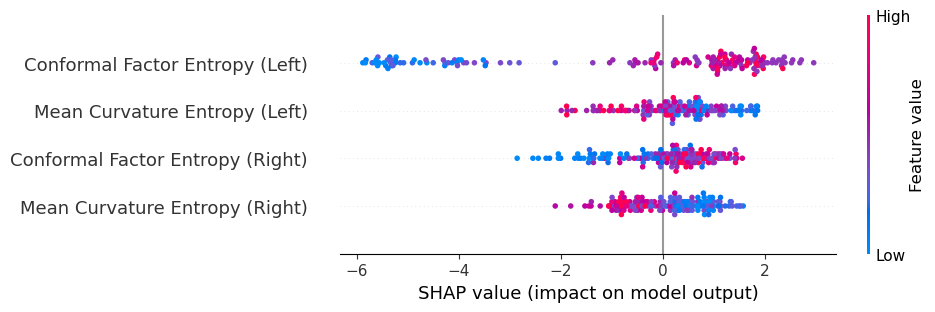

In [4]:
import shap
import matplotlib.pyplot as plt


explainer = shap.Explainer(model)

feature_names = ['Mean Curvature Entropy (Left)','Conformal Factor Entropy (Left)',
                 'Mean Curvature Entropy (Right)','Conformal Factor Entropy (Right)']

DatasetDataFrame =  pd.DataFrame(data = X, 
                        columns = feature_names)

shap_values = explainer(DatasetDataFrame)

plt.figure()   
shap.plots.beeswarm(shap_values, show=False)
#plt.savefig('Other_Plots\\Beeswarm_WholeDataset.pdf', bbox_inches='tight')
#plt.savefig('Other_Plots\\Beeswarm_WholeDataset.png', bbox_inches='tight')
plt.savefig('Beeswarm_WholeDataset.pdf', bbox_inches='tight')

## SHAP Scatter Plot

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<Figure size 640x480 with 0 Axes>

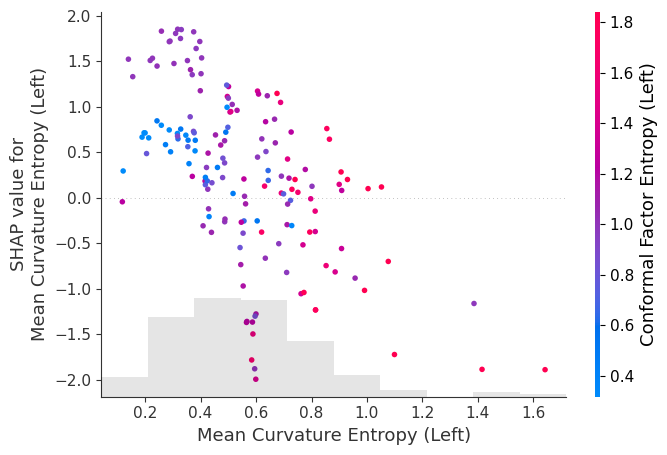

<Figure size 640x480 with 0 Axes>

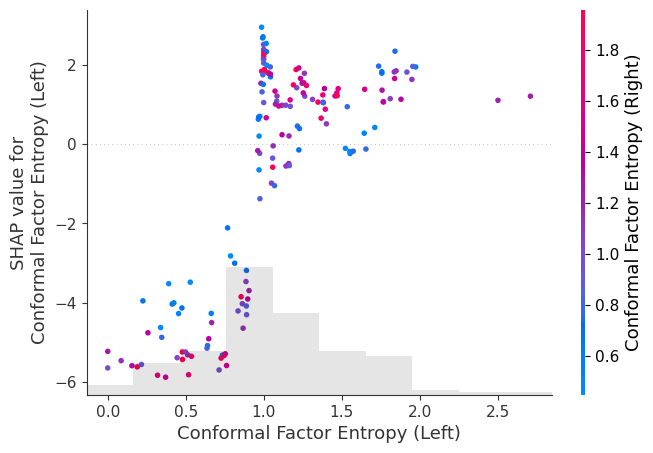

<Figure size 640x480 with 0 Axes>

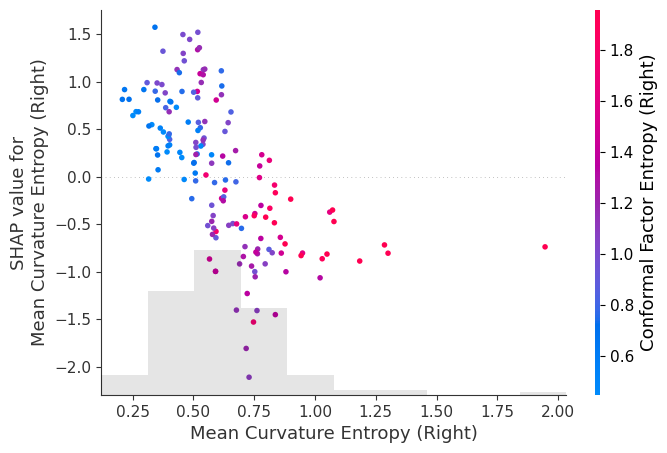

<Figure size 640x480 with 0 Axes>

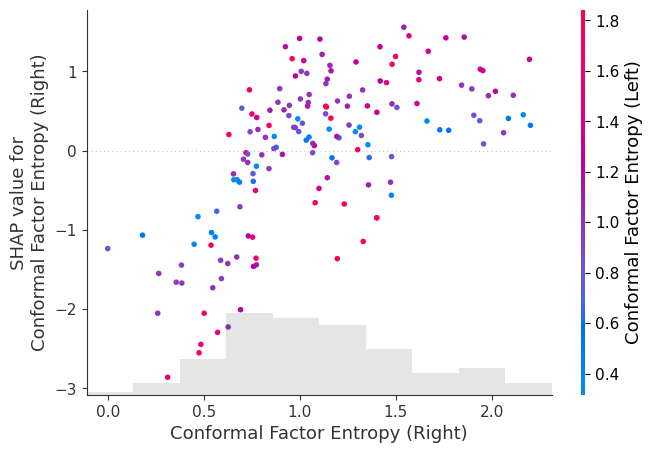

In [5]:
import os
import shap
import matplotlib.pyplot as plt

try: 
    os.mkdir("Scatter_Plots_WholeDataset") 
except OSError as error: 
    print(error)  


feature_names = ['Mean Curvature Entropy (Left)','Conformal Factor Entropy (Left)',
                 'Mean Curvature Entropy (Right)','Conformal Factor Entropy (Right)']

explainer = shap.Explainer(model)

DatasetDataFrame =  pd.DataFrame(data = X, 
                        columns = feature_names)

shap_values = explainer(DatasetDataFrame)
for featureName in feature_names:
    plt.figure()   
    shap.plots.scatter(shap_values[:,featureName], color=shap_values,show=False)
    #plt.savefig('Scatter_Plots_WholeDataset\\'+featureName+'.pdf', bbox_inches='tight')
    #plt.savefig('Scatter_Plots_WholeDataset\\'+featureName+'.png', bbox_inches='tight')
    plt.savefig('Scatter_Plots_WholeDataset\\'+featureName+'.pdf', bbox_inches='tight')


## SHAP Simplified plot

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<Figure size 640x480 with 0 Axes>

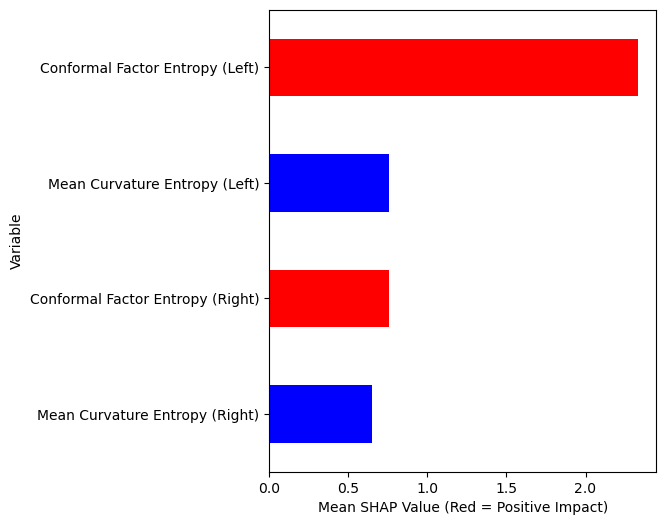

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np
DatasetDataFrame =  pd.DataFrame(data = X, 
                        columns = feature_names)

shap_values = shap.TreeExplainer(model).shap_values(DatasetDataFrame)

# shap.summary_plot(shap_values, DatasetDataFrame, plot_type="bar")
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    #plt.rcParams["font.family"] = "Times New Roman"
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
   
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        #print(df_v[i])
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    plt.figure()
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    #print(k2)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    #ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    ax.set_xlabel("Mean SHAP Value (Red = Positive Impact)")
    
    #plt.savefig('Other_Plots\\SHAP_Simplified_Plot.pdf', bbox_inches='tight')
    #plt.savefig('Other_Plots\\SHAP_Simplified_Plot.png', bbox_inches='tight')
    plt.savefig('SHAP_Simplified_Plot.pdf', bbox_inches='tight')
    #plt.close()

    
    
# ABS_SHAP(shap_values,DatasetDataFrame) 
ABS_SHAP(shap_values,DatasetDataFrame) 

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix

randomStateList = [344]

maxAcc = 0
for r in randomStateList:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = r) 
    model = RandomForestClassifier(n_estimators = 57, random_state = 0)     
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
#     if accuracy > maxAcc:
#         maxAcc = accuracy
#         print(r)
#         print(maxAcc)
    C = confusion_matrix(y_test, y_pred)
    TN = C[0][0]
    FP = C[0][1]
    FN = C[1][0]
    TP = C[1][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    TPR = TPR * 100
    print("Sensetivity:",TPR)
    # Specificity or true negative rate
    print("Specificity:",TNR)
    TNR = TN/(TN+FP) 
    TNR = TNR * 100
    # Precision or positive predictive value
    print("Precision:",PPV)
    PPV = TP/(TP+FP)
    PPV = PPV * 100

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    ACC = ACC*100
    print("Accuracy:",ACC)

    F1 = (2 * PPV * TPR) / (PPV + TPR)
    print("F1:",F1)
    print("-------------------")
    

Sensetivity: 82.35294117647058
Specificity: 100.0
Precision: 100.0
Accuracy: 81.25
F1: 82.35294117647058
-------------------


## SVM

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# y_train = y_train.reshape(-1, 1)
# X_train_scaled = sc_X.fit_transform(X_train)

randomStateList = [344]

for r in randomStateList:
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = r) 

    model = SVC(kernel = 'rbf')    #rbf linear sigmoid poly (degree = 2)
    model.fit(X_train, np.ravel(y_train))

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    C = confusion_matrix(y_test, y_pred)

#     print(accuracy*100)
#     plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
#     plt.show()
    
#     print("True Label")
#     print(y_test)
#     print("Predicted")
#     print(y_pred)
    TN = C[0][0]
    FP = C[0][1]
    FN = C[1][0]
    TP = C[1][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    TPR = TPR * 100
    print("Sensetivity:",TPR)
    # Specificity or true negative rate
    print("Specificity:",TNR)
    TNR = TN/(TN+FP) 
    TNR = TNR * 100
    # Precision or positive predictive value
    print("Precision:",PPV)
    PPV = TP/(TP+FP)
    PPV = PPV * 100

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    ACC = ACC*100
    print("Accuracy:",ACC)

    F1 = (2 * PPV * TPR) / (PPV + TPR)
    print("F1:",F1)
    print("-------------------")

Sensetivity: 82.35294117647058
Specificity: 80.0
Precision: 82.35294117647058
Accuracy: 71.875
F1: 75.67567567567568
-------------------
